# Non-linear Dimensionality Reduction using the GPLVM

### Natalia's code for Kernel PCA and Autoencoders

Dimensionality reduction in both of the datasets of interest is examined using Kernel PCA with polynomical, sigmoid and RBF kernels as well as using a Multilayer Autoencoder. Sklearn is used for KPCA and Keras for the Autoencoder.

# Experiments

# Oil dataset
(a) KPCA with polynomial kernel (degree 2) <br/>
(b) KPCA with sigmoid kernel (default values) <br/>
(c) KPCA with RBF kernel (gamma = 0.5) <br/>
(d) Autoencoder with 3 hidden layers <br/>

# Swiss roll dataset
(a) KPCA with polynomial kernel (degree 2) <br/>
(b) KPCA with sigmoid kernel (default values) <br/>
(c) KPCA with RBF kernel (gamma = 0.01) <br/>
(d) Autoencoder with 2 hidden layers <br/>



In [0]:
data_sr, lab_sr, x_1, x_2 = swiss_roll_generator(1000, sigma=0.05)

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(60, 80)
for l in np.unique(lab_sr):
    ax.scatter(data_sr[lab_sr == l, 0], data_sr[lab_sr == l, 1], data_sr[lab_sr == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(lab_sr + 1)),
               s=20, edgecolor='k')

In [0]:
from sklearn.neighbors import NearestNeighbors

import pods
from pods.datasets import swiss_roll_generated
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np

np.random.seed(123344)

def swiss_roll_generator(num_samples=1000, sigma=0.1):
  
  t = 3*np.pi/2*(1+2*np.random.rand(num_samples))
  h = 30*np.random.rand(num_samples)
  y = np.stack([t*np.cos(t),t*np.sin(t),h],axis=1) + np.random.normal(loc=0,scale=sigma,size=(num_samples,3))
  lab = (t//2 + h//12 + 2) % 2
  return y,lab


# Autoencoders on Swiss roll data

In [0]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

In [0]:
X, labels = swiss_roll_generator(1000, sigma=0.05)
X_norm = (X-X.min())/(X.max()-X.min()) # normalise data between 0 and 1

x_train = X_norm[0:799,:]
x_test = X_norm[800:1000,:]
y_train = labels[0:799]
y_test = labels[800:1000]


# code adapted from https://stats.stackexchange.com/questions/190148/building-an-autoencoder-in-tensorflow-to-surpass-pca

m = Sequential()
m.add(Dense(3,  activation='sigmoid', input_shape=(3,)))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(3,  activation='sigmoid'))
m.add(Dense(3,  activation='sigmoid'))


m.compile(loss='mean_squared_error', optimizer = Adam())
history = m.fit(x_train, x_train, batch_size=10, epochs=10, verbose=1, 
                validation_data=(x_test, x_test))

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(x_train)  # bottleneck representation
% time Renc = m.predict(x_train)        # reconstruction

Train on 799 samples, validate on 200 samples
Epoch 1/10
799/799 [==============================] - 3s 3ms/step - loss: 0.0726 - val_loss: 0.0644
Epoch 2/10
799/799 [==============================] - 0s 210us/step - loss: 0.0572 - val_loss: 0.0527
Epoch 3/10
799/799 [==============================] - 0s 206us/step - loss: 0.0475 - val_loss: 0.0457
Epoch 4/10
799/799 [==============================] - 0s 204us/step - loss: 0.0417 - val_loss: 0.0416
Epoch 5/10
799/799 [==============================] - 0s 200us/step - loss: 0.0382 - val_loss: 0.0391
Epoch 6/10
799/799 [==============================] - 0s 201us/step - loss: 0.0361 - val_loss: 0.0375
Epoch 7/10
799/799 [==============================] - 0s 199us/step - loss: 0.0348 - val_loss: 0.0366
Epoch 8/10
799/799 [==============================] - 0s 209us/step - loss: 0.0340 - val_loss: 0.0360
Epoch 9/10
799/799 [==============================] - 0s 203us/step - loss: 0.0334 - val_loss: 0.0355
Epoch 10/10
799/799 [=================

In [0]:
print(classification_error(Zenc, labels[:799]))
print(truthworthiness(X= Zenc, Y = X[:799,:]))

0.19524405506883605
(0.9006001496814128, 0.991655182125571)


Text(0.5, 1.0, 'Autoencoder with 2 hidden layers')

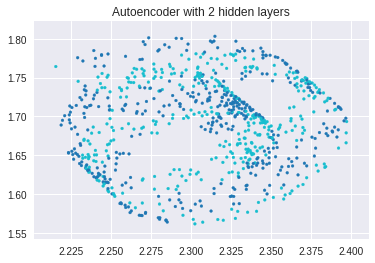

In [0]:
plt.scatter(Zenc[:,0], Zenc[:,1], c=y_train[:], s=8, cmap='tab10')
plt.title("Autoencoder with 2 hidden layers")

# KPCA on Swiss roll data

CPU times: user 27.6 ms, sys: 20 ms, total: 47.7 ms
Wall time: 25 ms
0.304
(0.8883167338709678, 0.9953842741935484)
CPU times: user 40 ms, sys: 23.1 ms, total: 63.2 ms
Wall time: 31.7 ms
0.284
(0.8759006048387097, 0.9917657258064516)
CPU times: user 164 ms, sys: 111 ms, total: 275 ms
Wall time: 148 ms
0.299
(0.881425806451613, 0.9889991935483871)
CPU times: user 101 ms, sys: 130 ms, total: 231 ms
Wall time: 120 ms
0.165
(0.9497945564516129, 0.996410685483871)
CPU times: user 96.9 ms, sys: 54.2 ms, total: 151 ms
Wall time: 75.7 ms
0.227
(0.9043933467741936, 0.9930193548387096)
CPU times: user 123 ms, sys: 72.1 ms, total: 195 ms
Wall time: 103 ms
0.322
(0.7885489919354839, 0.958260685483871)
CPU times: user 114 ms, sys: 86.3 ms, total: 201 ms
Wall time: 106 ms
0.422
(0.5650778225806452, 0.7768816532258065)
CPU times: user 134 ms, sys: 79 ms, total: 213 ms
Wall time: 111 ms
0.469
(0.5354790322580645, 0.6953917338709678)


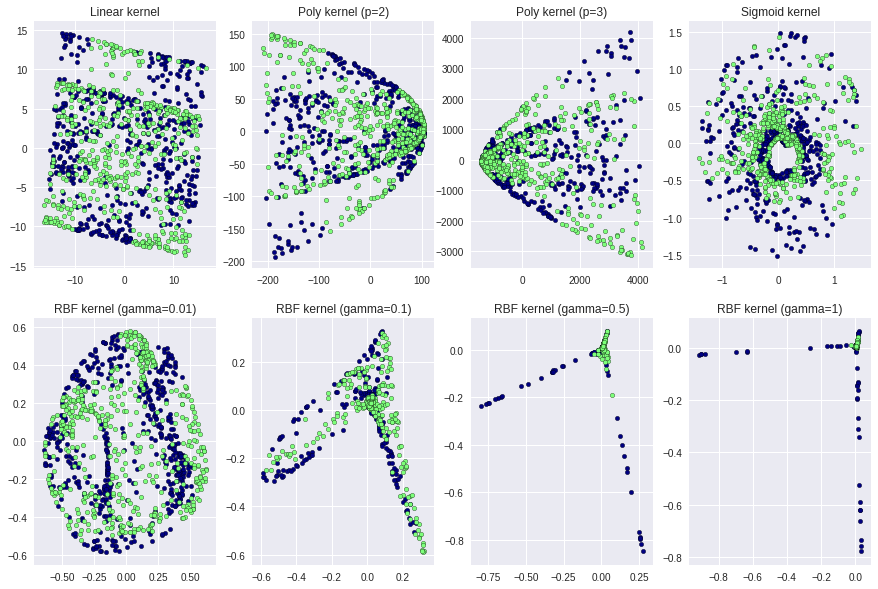

In [0]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

X, labels = swiss_roll_generator(1000, sigma=0.05)

plt.figure(figsize=(15,10))


kpca = KernelPCA(kernel="linear", n_components=2) # normal PCA
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax1 = plt.subplot(2, 4, 1)
ax1.title.set_text("Linear kernel")
    
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')

kpca = KernelPCA(kernel="poly", degree=2, n_components=2) # RBF with polynomial kernel of degree 2
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax2 = plt.subplot(2, 4, 2)
ax2.title.set_text("Poly kernel (p=2)")
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')
    
kpca = KernelPCA(kernel="poly", degree=3, n_components=2) # RBF with polynomial kernel of degree 3
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax3 = plt.subplot(2, 4, 3)
ax3.title.set_text("Poly kernel (p=3)")
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')
    
kpca = KernelPCA(kernel="sigmoid", n_components=2) # RBF with sigmoid kernel
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax4 = plt.subplot(2, 4, 4)
ax4.title.set_text("Sigmoid kernel")
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')

    
kpca = KernelPCA(kernel="rbf", gamma=0.01, n_components=2) # RBF with gamma 0.01
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax5 = plt.subplot(2, 4, 5)
ax5.title.set_text("RBF kernel (gamma=0.01)")
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')
    
kpca = KernelPCA(kernel="rbf", gamma=0.1, n_components=2) # RBF with gamma 0.1
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax6 = plt.subplot(2, 4, 6)
ax6.title.set_text("RBF kernel (gamma=0.1)")
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')
    
kpca = KernelPCA(kernel="rbf", gamma=0.5, n_components=2) # RBF with default gamma 0.5
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax7 = plt.subplot(2, 4, 7)
ax7.title.set_text("RBF kernel (gamma=0.5)")

for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')

kpca = KernelPCA(kernel="rbf", gamma=1, n_components=2) # RBF with default gamma 1
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax8 = plt.subplot(2, 4, 8)
ax8.title.set_text("RBF kernel (gamma=1)")
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')

# Accuracy metrics

In [0]:
def classification_error(X,labels):
  
  N = X.shape[0]
  one_NN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X)
  _, indices = one_NN.kneighbors(X)
  compt = 0
  for i in range(N):
    if labels[indices[i,0]]!=labels[indices[i,1]]:
      compt+=1

  return compt/N
  
  

def truthworthiness(X,Y,k=5):
  
  N = X.shape[0]
  
  X_one_NN = NearestNeighbors(n_neighbors= N, algorithm='auto').fit(X)
  Y_one_NN = NearestNeighbors(n_neighbors=N, algorithm='auto').fit(Y)
  _, X_ind = X_one_NN.kneighbors(X)
  _, Y_ind = Y_one_NN.kneighbors(Y)
  
  T = 0
  for i in range(N):
    U = np.setdiff1d(X_ind[i,1:k+1],Y_ind[i,1:k+1])
    for j in range(U.shape[0]):
      T = T + (np.where(Y_ind[i,] == U[j])[0] - k)
  T = 1 - 2/(N*k*(2*N - 3*k -1))*T
  
  # Continuity
  C = 0
  for i in range(N):
    V = np.setdiff1d(Y_ind[i,1:k+1], X_ind[i,1:k+1])
    for j in range(V.shape[0]):
      C = C + (np.where(X_ind[i,] == V[j])[0] - k)
  C = 1 - 2/(N*k*(2*N - 3*k -1))*C
  
  return T[0],C[0]
  
  
 

# Dimensionality Reduction on the Oil Flow Dataset using Multilayer Autoencoders

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
Train on 799 samples, validate on 200 samples
Epoch 1/20
799/799 [==============================] - 3s 4ms/step - loss: 0.0475 - val_loss: 0.0350
Epoch 2/20
799/799 [==============================] - 0s 273us/step - loss: 0.0333 - val_loss: 0.0278
Epoch 3/20
799/799 [==============================] - 0s 275us/step - loss: 0.0291 - val_loss: 0.0258
Epoch 4/20
799/799 [==============================] - 0s 272us/step - loss: 0.0280 - val_loss: 0.0253
Epoch 5/20
799/799 [==============================] - 0s 269us/step - loss: 0.0277 - val_loss: 0.0252
Epoch 6/20
799/799 [==============================] - 0s 271us/step - loss: 0.0277 - val_loss: 0.0252
Epoch 7/20
799/799 [==============================] - 0s 276us/step - loss: 0.0277 - val_loss: 0.0252
Epoch 8/20
799/799 [==============================] - 0s 266us/step - loss: 0.0277 - val_loss: 0.0252
Epoch 9/20
799/799 [==============================] - 0s 273us/step - lo

Text(0.5, 1.0, 'Autoencoder with 3 hidden layers')

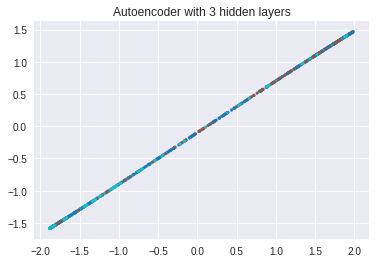

In [0]:
N = 1000

data_oil = pods.datasets.oil()
Y = data_oil['X'][:N]
Y = Y - Y.mean(0)
Y /= Y.std(0)
X = Y
labels = data_oil['Y'].argmax(axis=1)[:N]

X_norm = (X-X.min())/(X.max()-X.min()) # normalise data between 0 and 1

x_train = X_norm[0:799,:]
x_test = X_norm[800:1000,:]
y_train = labels[0:799]
y_test = labels[800:1000]

m = Sequential()
#m.add(Dense(512,  activation='elu', input_shape=(784,)))
#m.add(Dense(128,  activation='elu'))
#m.add(Dense(2,    activation='linear', name="bottleneck"))
#m.add(Dense(128,  activation='elu'))
#m.add(Dense(512,  activation='elu'))
#m.add(Dense(784,  activation='sigmoid'))

m.add(Dense(9,  activation='sigmoid', input_shape=(12,)))
m.add(Dense(6,  activation='sigmoid'))
m.add(Dense(4,  activation='sigmoid'))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(4,  activation='sigmoid'))
m.add(Dense(6,  activation='sigmoid'))
m.add(Dense(9,  activation='sigmoid'))
m.add(Dense(12,  activation='sigmoid'))

%time
m.compile(loss='mean_squared_error', optimizer = Adam())
history = m.fit(x_train, x_train, batch_size=10, epochs=20, verbose=1, 
                validation_data=(x_test, x_test))

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(x_train)  # bottleneck representation
% time Renc = m.predict(x_train)        # reconstruction

print(classification_error(Zenc, labels[:799]))
print(truthworthiness(X= Zenc, Y = X[:799,:]))

ax = plt.scatter(Zenc[:5000,0], Zenc[:5000,1], c=y_train[:5000], s=8, cmap='tab10')
plt.title("Autoencoder with 3 hidden layers")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs
Train on 799 samples, validate on 200 samples
Epoch 1/20
799/799 [==============================] - 1s 2ms/step - loss: 0.0567 - val_loss: 0.0419
Epoch 2/20
799/799 [==============================] - 0s 204us/step - loss: 0.0384 - val_loss: 0.0310
Epoch 3/20
799/799 [==============================] - 0s 170us/step - loss: 0.0312 - val_loss: 0.0269
Epoch 4/20
799/799 [==============================] - 0s 170us/step - loss: 0.0287 - val_loss: 0.0256
Epoch 5/20
799/799 [==============================] - 0s 169us/step - loss: 0.0279 - val_loss: 0.0253
Epoch 6/20
799/799 [==============================] - 0s 176us/step - loss: 0.0277 - val_loss: 0.0252
Epoch 7/20
799/799 [==============================] - 0s 170us/step - loss: 0.0277 - val_loss: 0.0252
Epoch 8/20
799/799 [==============================] - 0s 168us/step - loss: 0.0277 - val_loss: 0.0252
Epoch 9/20
799/799 [==============================] - 0s 169us/step - loss: 

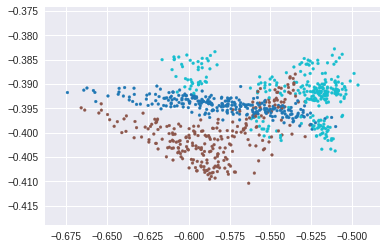

In [0]:
N = 1000

data_oil = pods.datasets.oil()
Y = data_oil['X'][:N]
Y = Y - Y.mean(0)
Y /= Y.std(0)
X = Y
labels = data_oil['Y'].argmax(axis=1)[:N]

X_norm = (X-X.min())/(X.max()-X.min()) # normalise data between 0 and 1

x_train = X_norm[0:799,:]
x_test = X_norm[800:1000,:]
y_train = labels[0:799]
y_test = labels[800:1000]

m = Sequential()
#m.add(Dense(512,  activation='elu', input_shape=(784,)))
#m.add(Dense(128,  activation='elu'))
#m.add(Dense(2,    activation='linear', name="bottleneck"))
#m.add(Dense(128,  activation='elu'))
#m.add(Dense(512,  activation='elu'))
#m.add(Dense(784,  activation='sigmoid'))

m.add(Dense(9,  activation='sigmoid', input_shape=(12,)))
m.add(Dense(6,  activation='sigmoid'))
m.add(Dense(4,  activation='sigmoid'))
m.add(Dense(2,    activation='linear', name="bottleneck"))
m.add(Dense(4,  activation='sigmoid'))
m.add(Dense(6,  activation='sigmoid'))
m.add(Dense(9,  activation='sigmoid'))
m.add(Dense(12,  activation='sigmoid'))

%time
m.compile(loss='mean_squared_error', optimizer = Adam())
history = m.fit(x_train, x_train, batch_size=10, epochs=20, verbose=1, 
                validation_data=(x_test, x_test))

encoder = Model(m.input, m.get_layer('bottleneck').output)
Zenc = encoder.predict(x_train)  # bottleneck representation
% time Renc = m.predict(x_train)        # reconstruction

print(classification_error(Zenc, labels[:799]))
print(truthworthiness(X= Zenc, Y = X[:799,:]))

plt.scatter(Zenc[:5000,0], Zenc[:5000,1], c=y_train[:5000], s=8, cmap='tab10')

# Dimensionality Reduction on the Oil Flow Dataset using Kernel PCA

CPU times: user 66.6 ms, sys: 61.2 ms, total: 128 ms
Wall time: 64.4 ms
0.264
(0.9192181451612903, 0.9914580645161291)
CPU times: user 40 ms, sys: 24.1 ms, total: 64.1 ms
Wall time: 32.1 ms
0.322
(0.9275201612903226, 0.9885677419354839)
CPU times: user 156 ms, sys: 114 ms, total: 270 ms
Wall time: 147 ms
0.384
(0.8967209677419354, 0.976854435483871)
CPU times: user 93.8 ms, sys: 63.5 ms, total: 157 ms
Wall time: 79.7 ms
0.352
(0.8956850806451613, 0.9910042338709677)
CPU times: user 86.8 ms, sys: 46.4 ms, total: 133 ms
Wall time: 67.2 ms
0.239
(0.9301957661290323, 0.9913415322580645)
CPU times: user 88.4 ms, sys: 61 ms, total: 149 ms
Wall time: 74.8 ms
0.25
(0.9041717741935484, 0.9845314516129032)
CPU times: user 91.4 ms, sys: 60.4 ms, total: 152 ms
Wall time: 76 ms
0.152
(0.8181721774193549, 0.9577951612903226)
CPU times: user 145 ms, sys: 144 ms, total: 289 ms
Wall time: 149 ms
0.225
(0.7085907258064517, 0.9211193548387097)


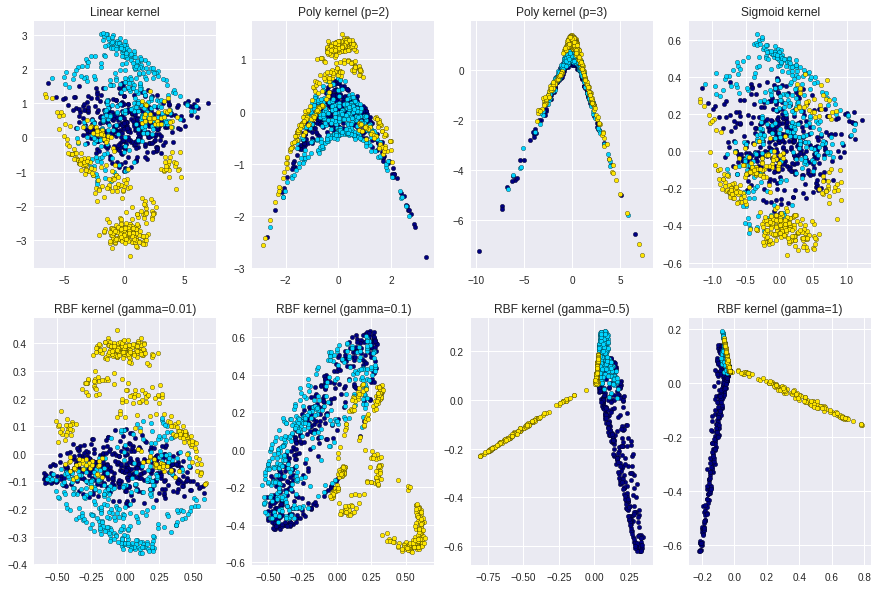

In [0]:
N = 1000
data_oil = pods.datasets.oil()
Y = data_oil['X'][:N]
Y = Y - Y.mean(0)
Y /= Y.std(0)
X = Y
labels = data_oil['Y'].argmax(axis=1)[:N]

plt.figure(figsize=(15,10))

kpca = KernelPCA(kernel="linear", n_components=2) # normal PCA
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax1 = plt.subplot(2, 4, 1)
ax1.title.set_text("Linear kernel")
    
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')

kpca = KernelPCA(kernel="poly", degree=2, n_components=2) # RBF with polynomial kernel of degree 2
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax2 = plt.subplot(2, 4, 2)
ax2.title.set_text("Poly kernel (p=2)")
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')
    
kpca = KernelPCA(kernel="poly", degree=3, n_components=2) # RBF with polynomial kernel of degree 3
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax3 = plt.subplot(2, 4, 3)
ax3.title.set_text("Poly kernel (p=3)")
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')
    
kpca = KernelPCA(kernel="sigmoid", n_components=2) # RBF with sigmoid kernel
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax4 = plt.subplot(2, 4, 4)
ax4.title.set_text("Sigmoid kernel")
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')

    
kpca = KernelPCA(kernel="rbf", gamma=0.01, n_components=2) # RBF with gamma 0.01
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax5 = plt.subplot(2, 4, 5)
ax5.title.set_text("RBF kernel (gamma=0.01)")
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')
    
kpca = KernelPCA(kernel="rbf", gamma=0.1, n_components=2) # RBF with gamma 0.1
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax6 = plt.subplot(2, 4, 6)
ax6.title.set_text("RBF kernel (gamma=0.1)")
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')
    
kpca = KernelPCA(kernel="rbf", gamma=0.5, n_components=2) # RBF with default gamma 0.5
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax7 = plt.subplot(2, 4, 7)
ax7.title.set_text("RBF kernel (gamma=0.5)")

for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')

kpca = KernelPCA(kernel="rbf", gamma=1, n_components=2) # RBF with default gamma 1
kpca.fit(X)
%time KPCA = kpca.fit_transform(X) 
principalDf = pd.DataFrame(data = KPCA, columns = ['component1', 'component2'])

print(classification_error(principalDf, labels))
print(truthworthiness(X= principalDf, Y = X))
ax8 = plt.subplot(2, 4, 8)
ax8.title.set_text("RBF kernel (gamma=1)")
for l in np.unique(labels):
    plt.scatter(principalDf[labels == l].component1, principalDf[labels == l].component2,
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')